# Object:
## Brain Tumor Detection


# Description:
### Using deep learning to state Tumor Presence and Tumor Type.

# Tools:
- Pandas
- Numpy
- cv2
- os
- sklearn
- matplotlip
- seaborn
- tensorflow.keras:
  -  CNN:
    - ResNet152()
    - ResNet50()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

---

# Color

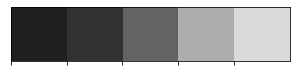

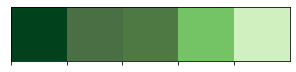

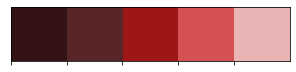

In [3]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

---

## **First neural network:**

In [26]:
binary_labels=['no','yes']

In [27]:
!unzip yes-no-brain-tumor2.zip

Archive:  yes-no-brain-tumor2.zip
   creating: yes-no-brain-tumor2/yes+no/
   creating: yes-no-brain-tumor2/yes+no/no/
  inflating: yes-no-brain-tumor2/yes+no/no/1 no.jpeg  
  inflating: yes-no-brain-tumor2/yes+no/no/10 no.jpg  
  inflating: yes-no-brain-tumor2/yes+no/no/11 no.jpg  
  inflating: yes-no-brain-tumor2/yes+no/no/12 no.jpg  
  inflating: yes-no-brain-tumor2/yes+no/no/13 no.jpg  
  inflating: yes-no-brain-tumor2/yes+no/no/14 no.jpg  
  inflating: yes-no-brain-tumor2/yes+no/no/15 no.jpg  
  inflating: yes-no-brain-tumor2/yes+no/no/17 no.jpg  
  inflating: yes-no-brain-tumor2/yes+no/no/18 no.jpg  
  inflating: yes-no-brain-tumor2/yes+no/no/19 no.jpg  
  inflating: yes-no-brain-tumor2/yes+no/no/2 no.jpeg  
  inflating: yes-no-brain-tumor2/yes+no/no/20 no.jpg  
  inflating: yes-no-brain-tumor2/yes+no/no/21 no.jpg  
  inflating: yes-no-brain-tumor2/yes+no/no/22 no.jpg  
  inflating: yes-no-brain-tumor2/yes+no/no/23 no.jpg  
  inflating: yes-no-brain-tumor2/yes+no/no/24 no.jpg  
 

We start off by appending all the images from the  directories into a Python list and then converting them into numpy arrays after resizing it.

In [28]:
X2 = []
y2 = []
image_size = 128
for w in binary_labels:
    folderPath2 = os.path.join(r'/content/yes-no-brain-tumor2','yes+no',w)
    for jj in tqdm(os.listdir(folderPath2)):
        img = cv2.imread(os.path.join(folderPath2,jj))
        img = cv2.resize(img,(image_size, image_size))
        X2.append(img)
        y2.append(w)

        
X2 = np.array(X2)
y2 = np.array(y2)

100%|██████████| 155/155 [00:00<00:00, 342.64it/s]


In [29]:

X2, y2= shuffle(X2,y2,random_state=101)

preprocessing using 'ImageDataGenerator'

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

In [31]:
datagen.fit(X2)
X2.shape

(253, 128, 128, 3)

split data into train, test datasets.

In [33]:
X_train2, X_test2, y_train2,y_test22=train_test_split(X2,y2, test_size=0.1, random_state=101)

In [34]:
y_train__2 = []
for i in y_train2:
    y_train__2.append(binary_labels.index(i))
y_train2 = y_train__2
y_train2 = tf.keras.utils.to_categorical(y_train2)


y_test__2 = []
for i in y_test22:
    y_test__2.append(binary_labels.index(i))
y_test22 = y_test__2
y_test22 = tf.keras.utils.to_categorical(y_test22)

creating the ResNet model:

In [35]:
from tensorflow.keras.applications import ResNet50
binary_resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(image_size,image_size,3))


94781440/94765736 [==============================] - 2s 0us/step


In [36]:
model2 = binary_resnet.output
model2 = tf.keras.layers.GlobalAveragePooling2D()(model2)
model2 = tf.keras.layers.Dropout(rate=0.2)(model2)
model2 = tf.keras.layers.Dense(2,activation='softmax')(model2)
model2 = tf.keras.models.Model(inputs=binary_resnet.input, outputs = model2)

In [37]:
X_train2.shape

(227, 128, 128, 3)

In [38]:
y_train2.shape

(227, 2)

In [39]:
model2.compile(loss='binary_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [40]:
checkpoint2 = ModelCheckpoint('resnet50v1.h5',monitor="val_accuracy",save_best_only=True,mode="AUTO",verbose=1)

reduce_lr2 = ReduceLROnPlateau(monitor='val_loss', factor=0.8,
                              patience=5, min_lr=0.001)

In [41]:
history2 = model2.fit (X_train2,y_train2,validation_split=0.2, epochs =30, verbose=1, batch_size=32,
                      callbacks =[checkpoint2,reduce_lr2])

Epoch 1/30
6/6 [==============================] - ETA: 0s - loss: 0.6374 - accuracy: 0.7459
Epoch 00001: val_accuracy improved from -inf to 0.67391, saving model to resnet50v1.h5
6/6 [==============================] - 14s 1s/step - loss: 0.6374 - accuracy: 0.7459 - val_loss: 18.4597 - val_accuracy: 0.6739 - lr: 0.0010
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 0.4004 - accuracy: 0.8785
Epoch 00002: val_accuracy did not improve from 0.67391
6/6 [==============================] - 2s 280ms/step - loss: 0.4004 - accuracy: 0.8785 - val_loss: 546.7638 - val_accuracy: 0.3913 - lr: 0.0010
Epoch 3/30
6/6 [==============================] - ETA: 0s - loss: 0.1141 - accuracy: 0.9613
Epoch 00003: val_accuracy did not improve from 0.67391
6/6 [==============================] - 2s 271ms/step - loss: 0.1141 - accuracy: 0.9613 - val_loss: 1270.7174 - val_accuracy: 0.3913 - lr: 0.0010
Epoch 4/30
6/6 [==============================] - ETA: 0s - loss: 0.1425 - accuracy: 0.9448
Epoch

plot of **validation accuracy** vs. **epochs**.

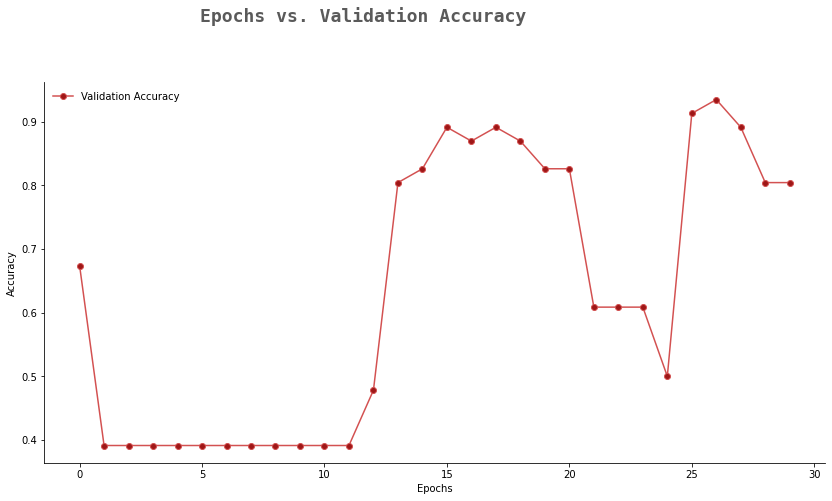

In [42]:
filterwarnings('ignore')

epochs = [i for i in range(30)]
fig, ax = plt.subplots(1,1,figsize=(14,7))
val_acc = history2.history['val_accuracy']

fig.text(s='Epochs vs. Validation Accuracy',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()

ax.plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax.legend(frameon=False)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

fig.show()





# **predictions & scores**

In [43]:
pred2 = model2.predict(X_test2)
pred2 = np.argmax(pred2,axis=1)
y_test_la = np.argmax(y_test22,axis=1)

In [44]:
print(classification_report(y_test_la,pred2))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.73      1.00      0.84        16

    accuracy                           0.77        26
   macro avg       0.86      0.70      0.71        26
weighted avg       0.83      0.77      0.74        26



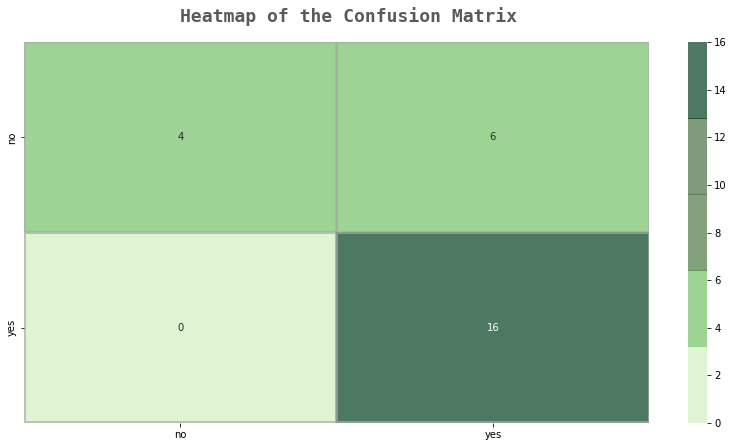

In [45]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test__2,pred2),ax=ax,xticklabels=binary_labels,yticklabels=binary_labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

# **a function to test the model performence!**

In [79]:
def tumor_presence(img):
      uploader= widgets.FileUpload()

      for name, file_info in uploader.value.items():
          img = Image.open(io.BytesIO(file_info['content']))
      opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
      img = cv2.resize(opencvImage,(128,128))
      img = img.reshape(1,128,128,3)
      p = model.predict(img)
      p = np.argmax(p,axis=1)[0]

      if p==0:
          print('No Tumor')
      elif p==1:
            print('Tumor present')
      else:
         print('unclassified')
      if p!=1:
         print(f'The Model predicts that it is a {p}')

here i used an another MRI image for meningioma tumor, and the model will recognize that there is a tumor,consequently the function will print out ('**tumor present**')


In [81]:
test_image = cv2.resize(cv2.imread(r'/content/random_meningioma.jpg', cv2.IMREAD_GRAYSCALE),  (128,128))

test_image = np.array(test_image).reshape( -1, 128, 128, 1)

In [82]:
tumor_presence(test_image)

Tumor present


## **# The second neural network:**

In [4]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [5]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  inflating: Testing/glioma_t

1 - splitting  data into X (images) and y (for labels)





In [6]:
Xx = []
Yy = []
image_size = 128
for i in labels:
    folderPath = os.path.join(r'/content/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        Xx.append(img)
        Yy.append(i)
        
for i in labels:
    folderPath = os.path.join(r'/content/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        Xx.append(img)
        Yy.append(i)
        
Xx = np.array(Xx)
Yy = np.array(Yy)

100%|██████████| 74/74 [00:00<00:00, 150.18it/s]


sample image of each class

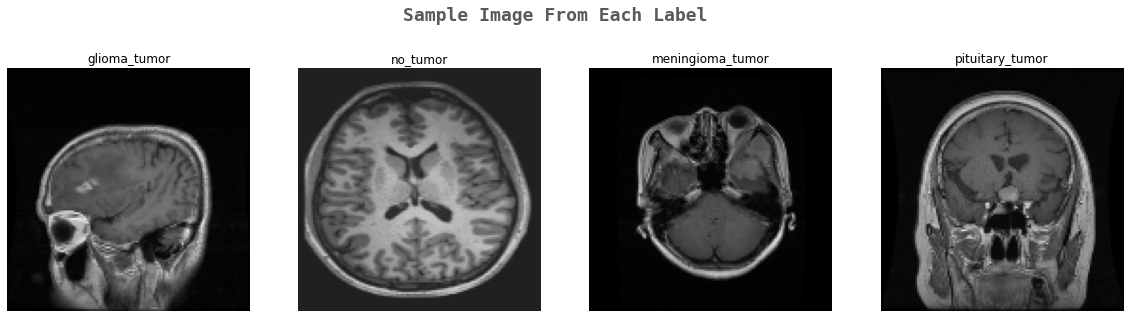

In [7]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if Yy[j]==i:
            ax[k].imshow(Xx[j])
            ax[k].set_title(Yy[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [8]:
Xx, Yy = shuffle(Xx,Yy, random_state=101)

In [9]:
Xx.shape

(3264, 128, 128, 3)

preprocessing using 'ImageDatagenerator'.

In [10]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(Xx)
Xx.shape

(3264, 128, 128, 3)

Dividing the dataset into **Training** and **Testing** sets.

In [11]:
X_train,X_test,y_train,y_test = train_test_split(Xx,Yy, test_size=0.1,random_state=101)

Performing **One Hot Encoding** on the labels after converting it into numerical values:


In [12]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

creating our model

In [13]:
from tensorflow.keras.applications import ResNet152V2
resnet = ResNet152V2(weights='imagenet', include_top=False,input_shape=(image_size,image_size,3))


234561536/234545216 [==============================] - 6s 0us/step


In [14]:
model = resnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=resnet.input, outputs = model)

In [15]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [16]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("resnet152v1.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [17]:
history = model.fit(X_train,y_train,validation_split=0.2, epochs =15, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/15
74/74 [==============================] - ETA: 0s - loss: 0.7313 - accuracy: 0.7297
Epoch 00001: val_accuracy improved from -inf to 0.14966, saving model to resnet152v1.h5
74/74 [==============================] - 87s 788ms/step - loss: 0.7313 - accuracy: 0.7297 - val_loss: 28.0928 - val_accuracy: 0.1497 - lr: 0.0010
Epoch 2/15
74/74 [==============================] - ETA: 0s - loss: 0.4420 - accuracy: 0.8570
Epoch 00002: val_accuracy improved from 0.14966 to 0.66156, saving model to resnet152v1.h5
74/74 [==============================] - 56s 754ms/step - loss: 0.4420 - accuracy: 0.8570 - val_loss: 1.3766 - val_accuracy: 0.6616 - lr: 0.0010
Epoch 3/15
74/74 [==============================] - ETA: 0s - loss: 0.3163 - accuracy: 0.8927
Epoch 00003: val_accuracy improved from 0.66156 to 0.69388, saving model to resnet152v1.h5
74/74 [==============================] - 54s 728ms/step - loss: 0.3163 - accuracy: 0.8927 - val_loss: 1.2378 - val_accuracy: 0.6939 - lr: 0.0010
Epoch 4/15
7

**validation accuracy** vs. **epochs**.

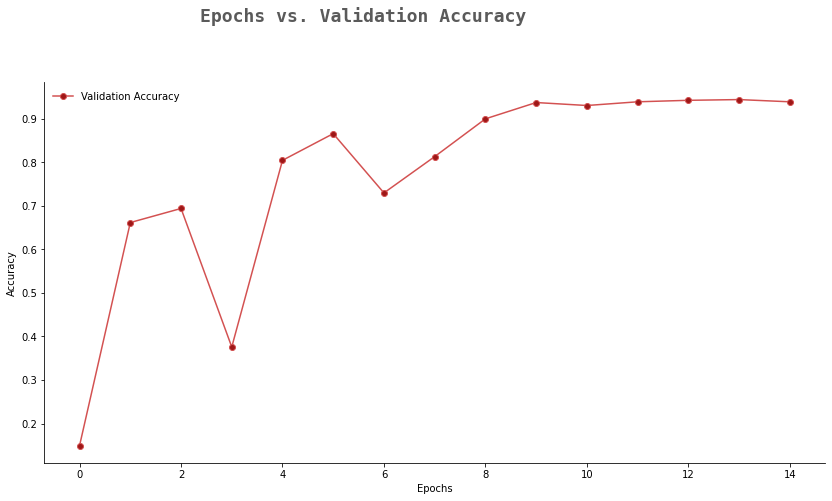

In [18]:
filterwarnings('ignore')

epochs = [i for i in range(15)]
fig, ax = plt.subplots(1,1,figsize=(14,7))
val_acc = history.history['val_accuracy']

fig.text(s='Epochs vs. Validation Accuracy',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()

ax.plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax.legend(frameon=False)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

fig.show()


## **predictions & scores.**

In [19]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test2 = np.argmax(y_test,axis=1)

In this, <br>
0 - Glioma Tumor<br>
1 - No Tumor<br>
2 - Meningioma Tumor<br>
3 - Pituitary Tumor<br>

In [21]:
print(classification_report(y_test2,pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        93
           1       0.94      0.98      0.96        51
           2       0.92      0.99      0.95        96
           3       0.99      0.98      0.98        87

    accuracy                           0.96       327
   macro avg       0.96      0.96      0.96       327
weighted avg       0.96      0.96      0.96       327



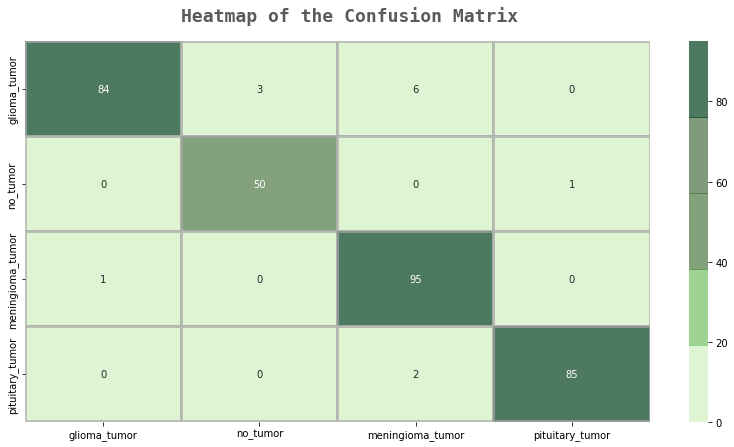

In [22]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

### **Here is a function to test the model performence!**

In [23]:
def tumor_type(img):
    uploader= widgets.FileUpload()

    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(128,128))
    img = img.reshape(1,128,128,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

the image that we will predict is actually a MRI image of normal brain, and it suppose to print out that the MRI image is of type (no_tumer).

In [24]:
test_image = cv2.resize(cv2.imread(r'/content/0c8c2658ce6f072ec207823e75f7c7_big_gallery.jpeg', cv2.IMREAD_GRAYSCALE),  (128,128))

test_image = np.array(test_image).reshape( -1, 128, 128, 1)


In [25]:
tumor_type(test_image)


The model predicts that there is no tumor
